In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sta
import seaborn as sns

In [2]:
df = pd.read_csv("Data_boats.csv")

In [3]:
# check if there is NA in the dataframe
df.isna().any()

RESPID    False
Q1.1      False
Q1.2      False
Q1.3      False
Q1.4      False
          ...  
Q16.25    False
Q16.26    False
Q16.27    False
Q17       False
Q18       False
Length: 82, dtype: bool

# 1. Correlation Matrix of Q1 Answers of the Survey

In [4]:
# get data of Q1 answers
df_matrix = df.iloc[:,1:30]

In [5]:
#create correlation matrix 
corr = df_matrix.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

<ipython-input-5-c494459b8ba9>:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Q1.1,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.7,Q1.8,Q1.9,Q1.10,Q1.11,Q1.12,Q1.13,Q1.14,Q1.15,Q1.16,Q1.17,Q1.18,Q1.19,Q1.20,Q1.21,Q1.22,Q1.23,Q1.24,Q1.25,Q1.26,Q1.27,Q1.28,Q1.29
Q1.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.2,0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.3,0.11,-0.03,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.4,0.20,-0.21,0.26,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.5,0.18,-0.21,0.40,0.37,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.6,0.27,-0.04,0.34,0.20,0.29,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.7,0.18,0.02,0.44,0.18,0.29,0.55,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.8,0.09,0.20,-0.05,0.00,-0.03,0.04,-0.01,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.9,0.08,0.09,0.58,0.17,0.33,0.35,0.49,-0.09,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Q1.10,0.11,0.16,0.14,0.10,0.14,0.12,0.12,0.09,0.14,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Question 1: Correlation Matrix Analysis

After computing and plotting the correlation matrix between the questions, we have realized that there are some of them which are significantly correlated between them. In this case, as the plot shows, questions 13 and 14 are the higest positive correlated ones (0.64), followed by question 16 and 17 (0.63), and questions 27 and 28 (0.62). The questions 3 and 9, 6 and 7 are also highly correlated, with correlation score of 0.58 and 0.55, respectively. 

The high correlation relationship between two questions exists when the answers of these pair are related to each other, meaning that, when an individual answers one question with a score of 5, it is higly probable that for those correlated questions, the answer is also a score of 5. This gives an insight that these questions might be asking for similar topic which provides similar information. 

There is no presence of strong negative correlation between two questions. However, question 2 and 12 have a slight negative or neutral relationship with other questions, which can be caused by the topic asked that might refer to different things compared with the rest of questions. For example, question 12 is related to the simplicity of the boat design, whereas there are others questions refering to more decorated and luxurious boats. For question 2, it is more related to the importance of price when buying a boat, while other questions are more focused on the importance of brand as purchasing criteria. 


# 2. Conducting a Principal Component Analysis 

In [6]:
from sklearn import decomposition as dcp
pca=dcp.PCA(n_components=29)
pca.fit(df_matrix)

PCA(n_components=29)

In [7]:
pca.components_

array([[-9.09462511e-02,  5.98230875e-03, -2.52079637e-01,
        -1.12166975e-01, -1.94237316e-01, -1.74605944e-01,
        -2.05306979e-01, -1.01082650e-02, -2.55101372e-01,
        -5.41549695e-02, -1.27103653e-01,  4.65780774e-02,
        -2.41985665e-01, -2.44645043e-01, -2.10848556e-01,
        -2.64387120e-01, -2.30240194e-01, -1.30337710e-01,
        -9.62748730e-02, -2.41932687e-01, -1.05950209e-01,
        -1.43695698e-01, -2.22488100e-01, -1.19195529e-01,
        -2.05590888e-01, -2.55056436e-01, -2.61983424e-01,
        -2.58200333e-01, -9.99668422e-02],
       [ 3.27415969e-02, -4.74888433e-01,  7.63413782e-02,
         1.91861889e-01,  2.05131283e-01,  8.99960114e-02,
         7.78827311e-02, -2.12744290e-01,  1.23918145e-02,
         7.89044926e-04, -3.93347304e-01, -5.25339730e-01,
         6.93930799e-02,  9.71951399e-02,  7.37990694e-02,
        -1.81607585e-01, -1.99604241e-01,  1.00268768e-01,
         8.29172647e-02, -1.38382900e-01,  1.19378054e-01,
         6.76

In [8]:
pca.explained_variance_

array([7.50390224, 1.83708163, 1.67162561, 1.4346473 , 0.99481279,
       0.9225859 , 0.72772437, 0.682431  , 0.65812527, 0.60203078,
       0.55941266, 0.54825455, 0.53301469, 0.52363144, 0.48214048,
       0.46677927, 0.45424564, 0.43568519, 0.43149923, 0.40868665,
       0.38210706, 0.37838019, 0.35692105, 0.34063044, 0.31975098,
       0.31171055, 0.30281006, 0.26812132, 0.26226365])

In [9]:
pca.explained_variance_ratio_

array([0.30256436, 0.07407285, 0.06740151, 0.05784632, 0.04011178,
       0.03719953, 0.02934253, 0.02751626, 0.02653623, 0.02427444,
       0.02255604, 0.02210614, 0.02149165, 0.02111331, 0.01944036,
       0.01882098, 0.01831561, 0.01756723, 0.01739845, 0.01647863,
       0.01540691, 0.01525664, 0.01439139, 0.01373454, 0.01289266,
       0.01256846, 0.01220958, 0.0108109 , 0.01057472])

In [10]:
explained_variance_ratio_cumul_sum=np.cumsum(pca.explained_variance_ratio_) #compute the cumulative sum
explained_variance_ratio_cumul_sum

array([0.30256436, 0.37663721, 0.44403871, 0.50188504, 0.54199682,
       0.57919634, 0.60853887, 0.63605513, 0.66259135, 0.6868658 ,
       0.70942184, 0.73152798, 0.75301963, 0.77413294, 0.79357329,
       0.81239427, 0.83070988, 0.84827711, 0.86567556, 0.88215419,
       0.89756111, 0.91281775, 0.92720914, 0.94094368, 0.95383634,
       0.9664048 , 0.97861438, 0.98942528, 1.        ])

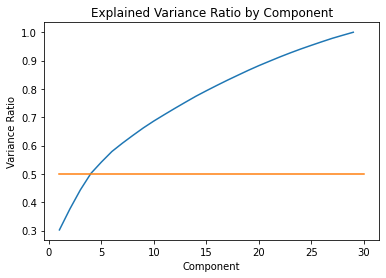

In [11]:
plt.title("Explained Variance Ratio by Component")
plt.plot(np.arange(1,30),explained_variance_ratio_cumul_sum) #so that the first component is at 1, not 0
plt.plot([1,30],[0.5,0.5]) #x:(1-10),y=0.5
plt.xlabel("Component")
plt.ylabel("Variance Ratio")
plt.show()

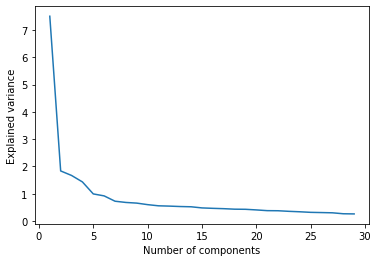

In [12]:
plt.plot(np.arange(1,30),pca.explained_variance_)
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [13]:
loadings=pd.DataFrame(pca.components_[0:4,:].T).set_index(np.arange(1,30))
loadings.columns = ['z1','z2','z3','z4']
loadings.index = df_matrix.columns
loadings

,z1,z2,z3,z4
Q1.1,-0.090946,0.032742,-0.216683,-0.120257
Q1.2,0.005982,-0.474888,0.168827,-0.376695
Q1.3,-0.252080,0.076341,0.231441,-0.020792
Q1.4,-0.112167,0.191862,-0.061916,0.032294
Q1.5,-0.194237,0.205131,0.045676,0.090574
Q1.6,-0.174606,0.089996,-0.152005,-0.205122
Q1.7,-0.205307,0.077883,-0.021382,-0.210249
Q1.8,-0.010108,-0.212744,-0.162031,-0.157224
Q1.9,-0.255101,0.012392,0.351427,-0.098570
Q1.10,-0.054155,0.000789,0.114534,-0.435828


In [14]:
pca_sparse=dcp.SparsePCA(alpha=5,n_components=4)
pca_sparse.fit(df_matrix)
loadings_sparse=pd.DataFrame(pca_sparse.components_.T).set_index(np.arange(1,30))
loadings_sparse.columns = ['z1','z2','z3','z4']
loadings_sparse.index = df_matrix.columns
loadings_sparse
# explain better and have clear interpretation on the new variable with four new features
# to see the most influential factor in the new features

,z1,z2,z3,z4
Q1.1,0.000000,0.000000,0.221990,0.000000
Q1.2,0.000000,0.681940,0.000000,0.000000
Q1.3,0.317548,0.000000,0.000000,0.000000
Q1.4,0.049854,-0.106454,0.097017,0.000000
Q1.5,0.209150,-0.145322,0.011821,0.000000
Q1.6,0.004510,0.000000,0.388744,0.000000
Q1.7,0.095832,0.000000,0.298071,0.000000
Q1.8,0.000000,0.195148,0.024520,0.000000
Q1.9,0.334424,0.000000,0.000000,0.000000
Q1.10,0.000000,0.173394,0.136176,0.146058


In [15]:
data_pca = pca.fit_transform(df_matrix)

#transform the dataframe with all observations using four new features
df_=pd.DataFrame()
df_["Brand"]=data_pca[:, 0].reshape(-1)
df_["Function"]=data_pca[:,1].reshape(-1)
df_['Psychic']=data_pca[:,2].reshape(-1)
df_['Knowledge']=data_pca[:,3].reshape(-1)
df_


,Brand,Function,Psychic,Knowledge
0,-5.596516,3.690842,0.885739,-0.254143
1,-2.069061,1.641866,1.563596,-0.009273
2,-2.718634,2.614583,2.716644,1.898413
3,-2.797228,1.406989,-0.281461,0.825179
4,-5.301887,0.697143,0.579743,1.680212
...,...,...,...,...
2808,-2.659766,2.587872,-0.391803,1.754867
2809,9.008467,-1.903317,2.220632,5.760613
2810,0.537434,-1.188677,2.207344,1.075539
2811,0.223975,-0.906015,0.560732,2.042514


In [16]:
#see the quantile of new features, better understand the trend of customers
df_.describe()

,Brand,Function,Psychic,Knowledge
count,2813.000000,2.813000e+03,2.813000e+03,2.813000e+03
mean,0.000000,2.020740e-17,-1.414518e-16,2.778518e-17
std,2.739325,1.355390e+00,1.292914e+00,1.197768e+00
min,-6.319141,-4.762428e+00,-3.967425e+00,-4.778710e+00
25%,-1.909767,-9.098714e-01,-8.531123e-01,-7.515046e-01
50%,0.052231,-4.133495e-02,6.123649e-03,-1.155671e-02
75%,1.783586,8.928188e-01,8.856951e-01,7.797627e-01
max,9.699764,5.198352e+00,5.990425e+00,5.760613e+00


## Question 2: Principal Component Analysis 

After conducting the principal component analysis (PCA), we have decided to select 4 components in order to maximize the ratio of explain varaince and the number of components. On the one hand, from statistical point of view, with 4 components we are able to explain more than 50% of the variance, which is relatively efficient, furthermore, from the explain varaince ratio, we could perceive that the following components were explaining everytime less of the variance. Therefore, we have considered to not include more components since the added value is scant.

From business perspective, after analysing the questions that each component were explaining, we have realised that each of them were focused on different topics. In this case, the first component explains more regarding the brand affiliation, the second about the importance of boat functionality, the thrid regarding the psychic utility level of using boat to the individuals and the last one about the knowledge level in boats in terms of self-reparation ability. Therefore, we have considered that we would be able to build a perceptual map with these components; whether the customers are more focused on the functionality of the boat by itself, or on the psychological and self-fulfillment needs that boat can give. 


z1: brand affiliation 

z2: boat functionality

z3: psychic utilities level

z4: boat knowledge (in terms of self-reparation ability)

# 3. Random subsample of observations

In [17]:
random_subset = df_.sample(n=3,random_state=1)
random_subset

,Brand,Function,Psychic,Knowledge
2190,5.692440,-1.756862,-0.225813,1.884964
877,-1.574657,-0.381573,-0.216466,-1.346125
1045,-0.636975,2.271627,-0.263542,-0.442073


##  Question 3: Pick three customers and describe them, based on how they score on the components you have selected.


1. Customer 2190: 

As the table above shows, the purchasing behaviour of the customer 2190 is highly influenced by the questions regarding brand affiliation, the high preference towards self-repairment of the boats and the functionality of the boats. In this case, it is relevant to highlight that the functionality related questions have a negative impact on the decision-making of the customer.However, the psychological and self-fulfillment related questions do not highly influence on his decision. 


2. Customer 877: 

The customer 877 is negatively influenced by the brand affiliation and the low preference towards self-reparation on the boats. Whereas the functionality and psychic associated questions are relatively less important for his purchasing decision. The features might indicate that the customer has a relatively neutral position when making the purchasing decision.



3. Customer 1045:

From the results obtained, the customer 1045 is strongly influenced by the functionality of the boats compared with the other features, which their scores are close to zero and slightly negative affects. This gives an insight that the customer might make the purchasing decision based on the preference of his boating related activities.


# 4. Derive Customer Segments Using K-Means Clustering and Hierarchical Clustering

## Hierarchical Clustering

In [18]:
# Normalise data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_scale= pd.DataFrame(min_max_scaler.fit_transform(df_.values), columns=df_.columns, index=df_.index)
df_scale

,Brand,Function,Psychic,Knowledge
0,0.045111,0.848655,0.487371,0.429303
1,0.265316,0.642951,0.555443,0.452537
2,0.224766,0.740606,0.671236,0.633544
3,0.219860,0.619371,0.370157,0.531712
4,0.063503,0.548107,0.456642,0.612840
...,...,...,...,...
2808,0.228441,0.737924,0.359076,0.619924
2809,0.956845,0.287037,0.621425,1.000000
2810,0.428030,0.358782,0.620091,0.555467
2811,0.408462,0.387160,0.454732,0.647217


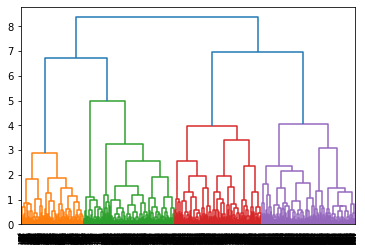

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(df_scale,method= 'ward')

dendrogram(Z)
plt.show()

In [20]:
labels=fcluster(Z, 4, criterion='maxclust')

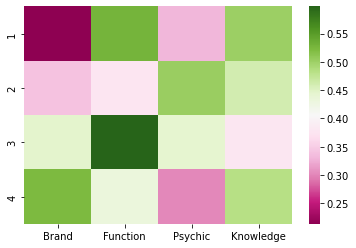

In [21]:
df_hier=df_scale.copy()
df_hier["Labels"]=labels
df_hier=df_hier.groupby(df_hier["Labels"]).mean().reset_index()
df_hier=df_hier.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(df_hier,cmap="PiYG")
plt.show()

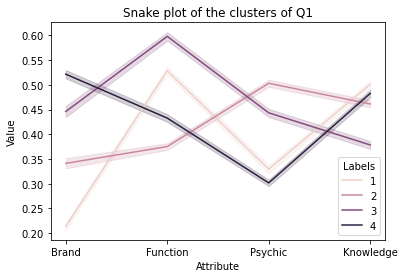

In [22]:
df_hier=df_scale.copy()
df_hier["Labels"]=labels
df_hier_melt = pd.melt(df_hier.reset_index(),
                            id_vars=['Labels'],
                            value_vars=['Brand','Function','Psychic','Knowledge'],
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters of Q1')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=df_hier_melt)
plt.show()

## K-means clustering

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=888).fit(df_scale)

In [24]:
kmeans.labels_

array([1, 1, 1, ..., 2, 3, 0], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[0.52980072, 0.57341457, 0.48806996, 0.41634616],
       [0.23702149, 0.56435269, 0.35448784, 0.47902071],
       [0.28222489, 0.33956258, 0.5035381 , 0.43159498],
       [0.50302495, 0.42097877, 0.29900017, 0.47373241]])

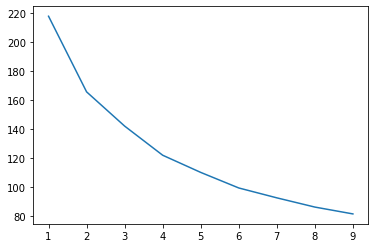

In [26]:
inertia_K=[]
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scale)
    inertia_K.append(kmeanModel.inertia_)
plt.plot(K,inertia_K)
plt.show()

## Question 4: Use the customers' component scores to derive customer segments using Python.

In the case of our analysis, we have applied both hierarchical and K-means to proceed the clustering process. We have decided not to implement any normalization neither scaling process, since all the questions are ranged between 1-5, therefore, in this context, there is not extreme values that requires to apply this process. 

 From the hierarchical analysis, we could perceive that the distance between different clusters is further after grouping them into 4, comparing with 5 clusters, which means that, the difference between these four groups is more significant. Furthermore, from the K-means method, we could see that the inertia decreases rapidly  before 4 clusters, which afterwards, the slope became less steep.
 Therefore, after analysing the results of both clustering methods, we have decided to segment the boating market into 4 clusters. 


However, after studying the results obtained from the Snake plot and heatmap showed above, we could perceive that the value between clusters in terms of brand and functionality presents a difference. Whereas, for the other two features, they have a relatively similar values. This gives a insight that, when implementing the marketing strategy, we could consider brand and functionality as the main focus of target.

 

# 5. Create a Profile of your Customer Segments of Survey Q2.2-Q.15 

In [27]:
df_q = df.iloc[:,30:52]
df_q

,Q2,Q2.Cluster,Q3,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,...,Q9.2,Q9.3,Q9.4,Q9.5,Q10,Q11,Q12,Q13,Q14,Q15
0,1,1,4,11,6,90,2,3,3,3,...,4,4,4,4,100,2,19,5,1,2
1,1,1,4,3,8,25,2,5,4,5,...,4,4,5,4,30,2,17,5,1,1
2,1,1,5,5,8,21,1,2,4,4,...,4,4,4,4,30,1,14,5,1,1
3,1,1,4,6,8,22,3,4,3,4,...,2,4,3,2,30,1,13,5,1,1
4,1,1,4,5,8,24,1,4,3,3,...,3,3,3,3,30,1,13,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,3,1,5,3,1,16,2,4,3,4,...,4,5,3,5,40,2,18,1,1,4
2809,1,1,2,4,1,19,1,3,5,5,...,3,2,5,1,22,1,16,1,1,3
2810,1,1,4,4,1,20,3,4,3,3,...,4,3,4,4,45,1,15,1,1,4
2811,0,0,4,11,1,20,3,3,3,3,...,3,3,3,3,2,2,11,5,1,2


In [28]:
df_q = df_q.drop(columns=['Q2.Cluster'])

In [29]:
df_q = pd.get_dummies(df_q,drop_first=False,columns=['Q13'])
df_q = pd.get_dummies(df_q,drop_first=False,columns=['Q14'])

In [30]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df_norm= pd.DataFrame(min_max_scaler.fit_transform(df_q.values), columns=df_q.columns, index=df_q.index)
df_norm

,Q2,Q3,Q4,Q5,Q6,Q7.1,Q7.2,Q7.3,Q7.4,Q8,...,Q13_4,Q13_5,Q13_6,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7
0,0.1,0.75,1.0,0.714286,0.272446,0.25,0.50,0.50,0.50,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1,0.75,0.2,1.000000,0.071207,0.25,1.00,0.75,1.00,0.333333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,1.00,0.4,1.000000,0.058824,0.00,0.25,0.75,0.75,0.666667,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.1,0.75,0.5,1.000000,0.061920,0.50,0.75,0.50,0.75,0.333333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.1,0.75,0.4,1.000000,0.068111,0.00,0.75,0.50,0.50,0.333333,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2808,0.3,1.00,0.2,0.000000,0.043344,0.25,0.75,0.50,0.75,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2809,0.1,0.25,0.3,0.000000,0.052632,0.00,0.50,1.00,1.00,0.666667,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2810,0.1,0.75,0.3,0.000000,0.055728,0.50,0.75,0.50,0.50,0.333333,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2811,0.0,0.75,1.0,0.000000,0.055728,0.50,0.50,0.50,0.50,0.000000,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


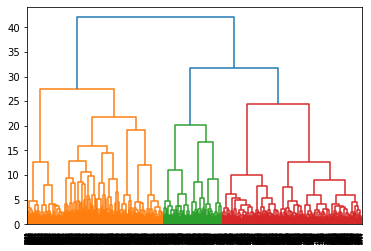

In [31]:
Z1 = linkage(df_norm,method= 'ward')

dendrogram(Z1)
plt.show()

In [32]:
labels=fcluster(Z1, 4, criterion='maxclust') 

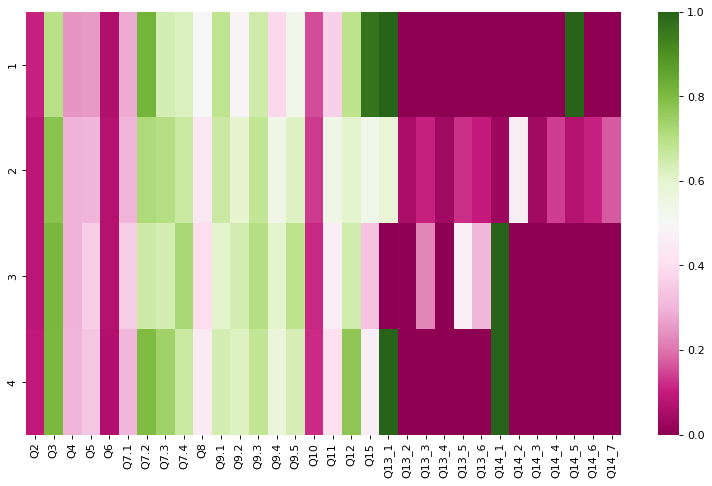

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,7),dpi=80)

df_hier1=df_norm.copy()
df_hier1["Labels"]=labels

df_hier1= df_hier1.groupby(df_hier1["Labels"]).mean().reset_index()
df_hier1=df_hier1.drop(columns=["Labels"]).set_index(np.arange(1,5))
sns.heatmap(df_hier1,cmap="PiYG")
plt.show()

In [34]:
df_hier1['Q11']

1    0.363057
2    0.540120
3    0.453815
4    0.404803
Name: Q11, dtype: float64

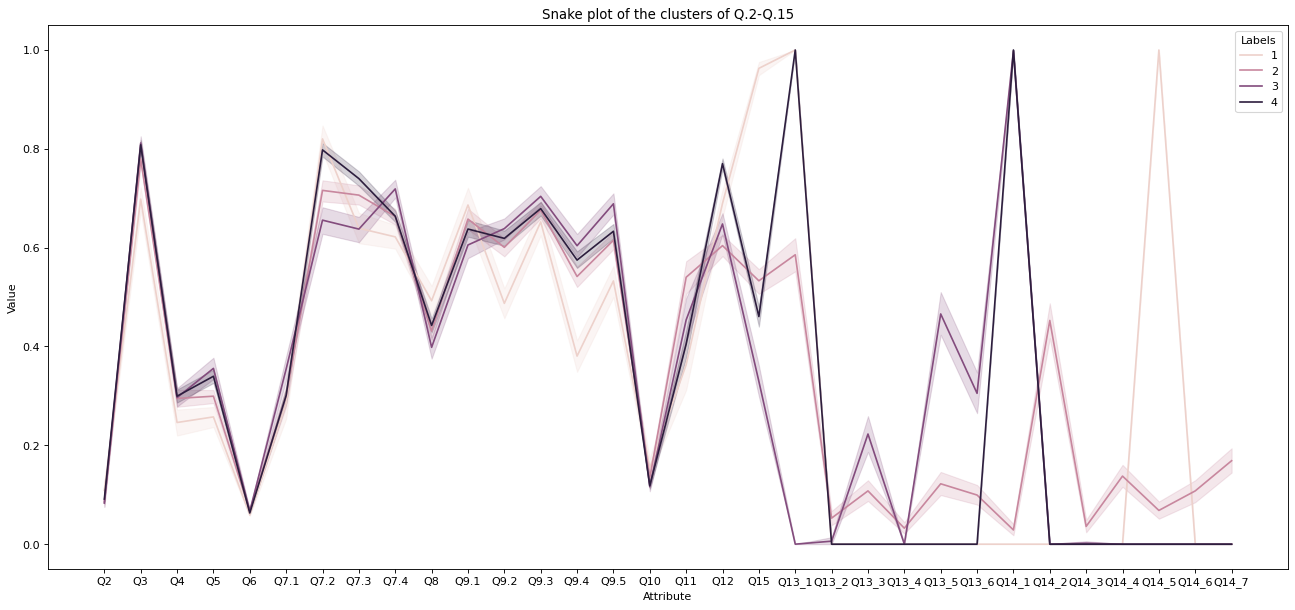

In [35]:
plt.figure(figsize=(20,9),dpi=80)

df_hier1=df_norm.copy()
df_hier1["Labels"]=labels
df_hier_melt1 = pd.melt(df_hier1.reset_index(),
                            id_vars=['Labels'],
                            value_vars=['Q2','Q3','Q4','Q5','Q6','Q7.1','Q7.2','Q7.3','Q7.4','Q8','Q9.1','Q9.2','Q9.3','Q9.4','Q9.5','Q10',
                            'Q11','Q12','Q15','Q13_1','Q13_2','Q13_3','Q13_4','Q13_5','Q13_6','Q14_1','Q14_2','Q14_3','Q14_4','Q14_5','Q14_6','Q14_7'],
                            var_name='Attribute',value_name='Value')
plt.title('Snake plot of the clusters of Q.2-Q.15')
sns.lineplot(x="Attribute", y="Value", hue='Labels', data=df_hier_melt1)
plt.show()

## Question 5: Customer Profile
As mentioned previously, after implementing the hierarchical clustering, we have reached to 4 different clusters with different profile of customers. From the results of the Snake plot, we focused on those questions which present significant difference among the different clusters to describe the profile of our potential customers, which are mainly the civil and employment status and the engaged boating activities, among others.

Cluster 1: The customers from cluster 1 are mainly retired people, who majority of them are married and do not usually use the boats for swimming or water sports related activities. Therefore, their purchasing preference is more focused on the lower price and lower horse power boats. 

Cluster 2: The customers of this cluster are mainly the self-employed ones, mostly married, who use the boat for cruising, fishing and for entertainment or socializing purposes.

Cluster 3: The customers of this cluster are mainly paid-employees, who might be single or have never married. They also use the boat for cruising and entertainment or socializing purposes, mostly with their friends. 

Cluster 4: The individuals of this cluster are mainly the paid-employees who are married that also use boats for cruising and entertainment or socializing purposes, mainly with their family or spounse. 

# 6. Discuss the Robustness of the Results  

In this case, the number of components selected to test the robustness of our model is 3 and 5. 

After chosing 3 components, we found out that there is just slight difference between the results compared with 4 components. Basically, the explained questions are similar and relates to the same topic, but is less specific than with 4 components. From the explained variance we could perceive that, with 3 components, the model explains less than half of it, which might not provide enough information for further analysis.

In terms of 5 components, it is true that it can explain more information by adding a new component, however, we found that there were two components that explain similar related information. Meaning that, they explain the same type related questions than with 4 components, but in a more specific way, since they take more questions into account. However, the added value by including those questions is relatively small, since the explained variance does not increase significantly as the provided information is related.

After analysing the results of both number of components we consider that it is relatively robust, since the explained questions between different components are basically related to similar topics, just with difference of specificity regarding those topics. Furthermore, the slope of inertia curve of different selected components are the same, with the only difference in the variance explained, meaning that, the more number of components selected, the larger the variance explained.

# 7: Recommendation of Marketing Strategy to Target Customer Segmentations

In [36]:
df_7= df.iloc[:,80:82]

In [37]:
df_7.groupby(df_7['Q17']).size()

Q17
0    1871
1     942
dtype: int64

In [38]:
df_7.groupby(df_7['Q18']).size()

Q18
0    1411
1    1402
dtype: int64

## Question 7: Recommendations

After studying the results obtained in the whole analysis process, we have identified some target segmentation for the company. In this case, the company can segment the market into two groups according to the different ages, the elder people and younger group people, and the usage purpose of each age group, fishing or leisure. 


On the one hand, we have the elder people group that use the boats mainly for fishing purposes with their friends or family and require a lower price of boats. While,for the yonger people segment, their main purpose of usage is for leisure activities with their family and friends and do not have a strict restriction in terms of pricing.


Regarding the product development, as mentioned previously, the boats should met with their usage purpose and their requirements. For elder people, it would be better to focus on boats with simple design that are easy to manage, since they value more the functionality of the boat by itself. Therefore, the company can design lower price boats without too much added values. Whereas for yonger people segment, we can design more elaborated and complex boats by adding some technological advance equipments inside, which in this case, the price range can increase according to the different levels of added values. 


In general, all the boats should have more than two seats available, since both groups use it with their friends or family, rarely alone. The type range of boats can be divided into 4: basic, advanced, premium and the customer can even personalise the design of the boats and the equipment included according to their preference. Each type of boat is allocated to the different needs of customers and their purchasing power, the price range can also vary mainly from $10K to $50K, which can also increase if the customer want to add personalised services.


In terms of marketing promotion, we have discovered that from the survey, relatively few customers would recommend the brand. Therefore, we can promote some campaigns to increase recommendation rate by word-of-mouth. For example, as we have mentioned previously, mostly both segment of customers use boat with their families hence, we can offer discounts to those that recommend their friends to buy boats together. At the same time, the company can increase the brand exposure and awareness through social media by enhancing the engagement between consumers and the marketing campaigns. 

Furthermore, from the results of Question 18, significant percentage of customers in the survey would buy a new boat again, therefore, the company can organise some free testing opportunities to the customers when launching a new desgin of boat as a marketing strategy. As well as organising some seasonal activities especially for families in order to diffuse the usage of boat as a family leisure activity and increase the consumer engagement. 